In [1]:
#import needed libraries
import numpy as np #for numerical operations
import pandas as pd #for file operations
import matplotlib.pyplot as plt #for plotting graphs
import seaborn as sns #also for plotting graphs
from sklearn.linear_model import LinearRegression #for machine learning 
from sklearn import metrics #for testing the machine learning model

In [2]:
# Importing the dataset
dataset = pd.read_csv('mean-relative-humidity-Japanweather1.csv')

In [3]:
dataset.head() #show the first 5 rows of the dataset

,year,total_precipitation,mean_air_temperature,mean_wind_speed,percentage_possible_sunshine,total_sunshine_duration,solar_radiation,mean_relative_humidity
0,Jan-10,75.5,-3.4,5.5,14,40.4,8.1,75
1,Feb-10,109.5,-4.9,4.1,17,48.8,9.1,74
2,Mar-10,100.5,-1.4,4.7,29,108.0,12.2,68
3,Apr-10,94.0,3.5,4.3,36,146.2,14.5,77
4,May-10,76.5,7.3,4.9,37,168.6,19.2,86


In [4]:
X = dataset.iloc[:, 1:-1].values #select All rows, all columns excluding the first and the last column
y = dataset.iloc[:, -1].values #select All rows, last column

#dates = X[:,0]
dates = dataset.iloc[:,0] #store the dates from the dataset (first column) in a variable, to be used when plotting graphs

In [5]:
#train a linear regression model on the data
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [6]:
#find the coefficient of determination to see how well the model performs
r_sq = model.score(X, y)
print('coefficient of determination: ', r_sq)

coefficient of determination:  0.7234956028998238


In [7]:
y_pred = model.predict(X) #using the trained model, try to predict outcomes
print('predicted response: ', y_pred, sep='\n') #display predictions

predicted response: 
[69.45083993 71.49151552 71.98047684 75.53977315 80.37168336 83.73015668
 89.65586027 84.31141765 72.28599918 69.9957445  69.4999378  71.37472212
 67.9737168  67.57597669 71.26194873 74.19235089 81.14296375 84.70924195
 87.04931872 83.85867272 76.06670153 70.00389964 67.62982242 70.79789774
 69.58498418 66.32432673 69.68022631 74.14042253 82.06250152 82.52718233
 86.15018077 85.66213248 79.92859201 70.91284579 70.19413581 71.78694932
 68.59347173 67.73864254 71.57135753 74.32929238 83.34738436 83.56976593
 82.14513743 84.58897361 76.92875707 68.76955452 69.88242754 69.05540894
 70.33568468 62.24290142 65.29250196 71.57435715 80.81957118 82.72843225
 85.21416147 82.2025422  76.96891114 68.92475452 65.54861606 69.36605236
 68.17475116 63.98062009 72.61715585 72.99528813 81.66134411 83.10340788
 85.15468067 81.42334261 75.25096987 70.05750668 64.79514104 70.73737555
 71.47422098 74.03515087 71.96629193 74.91625417 79.02716795 83.3018856
 84.13392651 83.35956585 75.282

In [8]:
#model evauluation metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 2.865700416557389
Mean Squared Error: 15.6607290093979
Root Mean Squared Error: 3.9573638965096323


Text(0.5, 1.0, 'Mean relative humidity - actual and predicted values')

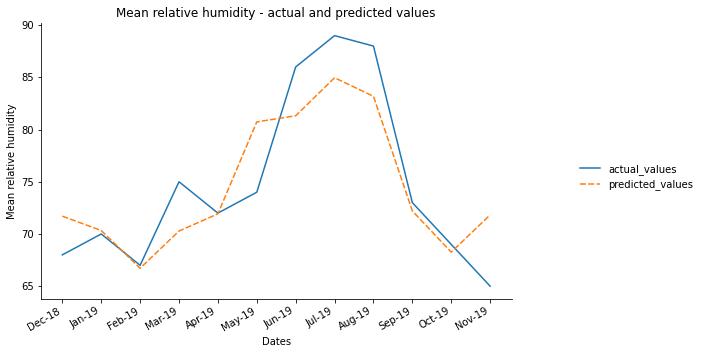

In [9]:
df = pd.DataFrame(dict(actual_values=y[-13:-1], predicted_values=y_pred[-13:-1]), index=dates[-13:-1]) #create a dataframe containing the last 12 actual and predicted values with the month and year as the index of the dataframe
g = sns.relplot(kind="line", data=df) #plot a line graph using the dataframe
g.fig.autofmt_xdate() #adjust the size of the x-axis so the dates have some spacing
g.fig.set_size_inches(10, 5) #set the size of the figure
plt.xlabel('Dates') #set the label for the x-axis
plt.ylabel('Mean relative humidity') #set the label for the y-axis
plt.title('Mean relative humidity - actual and predicted values') #set the title of the graph